# MOM025 NYF Wave AMOC?

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface

import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Input NetCDF file info
hgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'
vgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ocean.ncra501-520.nc'

nyf_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/nyf.ty_trans.501-520.cat.nc'
uparg_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_UPArg/uparg.ty_trans.501-520.cat.nc'
up_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_UP/up.ty_trans.501-520.cat.nc'
dwn_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_Dwn/dwn.ty_trans.501-513.cat.nc'
avg_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080_avgiaf/avg.ty_trans.156-175.cat.nc'
avgatl_file ='/g/data1/v45/pas561/mom/archive/gfdl_avgiaf_Atl/avgatl.ty_trans.156-175.cat.nc'
avgupatl_file ='/g/data1/v45/pas561/mom/archive/gfdl_avgiaf_UPAtl/avgupatl.ty_trans.156-175.cat.nc'
avgup_file ='/g/data1/v45/pas561/mom/archive/gfdl_avgiaf_UP/avgup.ty_trans.156-175.cat.nc'

nyf_dir ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/'
uparg_dir ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_UPArg/'
up_dir ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_UP/'
dwn_dir ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_Dwn/'
avg_dir ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080_avgiaf/'
avgatl_dir ='/g/data1/v45/pas561/mom/archive/gfdl_avgiaf_Atl/'
avgupatl_dir ='/g/data1/v45/pas561/mom/archive/gfdl_avgiaf_UPAtl/'
avgup_dir ='/g/data1/v45/pas561/mom/archive/gfdl_avgiaf_UP/'



sim_files =[nyf_file,up_file,uparg_file,dwn_file,avgatl_file,avgupatl_file,avgup_file]
sim_dirs =[nyf_dir,up_dir,uparg_dir,dwn_dir,avg_dir,avgatl_dir,avgupatl_dir,avgup_dir]

sim_names =['nyf','up','uparg','dwn','avg','avgatl','avgupatl','avgup']
print sim_files
print sim_files[0]

#variable = 'sea_level'

['/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/nyf.ty_trans.501-520.cat.nc', '/g/data1/v45/pas561/mom/archive/gfdl_nyf_UP/up.ty_trans.501-520.cat.nc', '/g/data1/v45/pas561/mom/archive/gfdl_nyf_UPArg/uparg.ty_trans.501-520.cat.nc', '/g/data1/v45/pas561/mom/archive/gfdl_nyf_Dwn/dwn.ty_trans.501-513.cat.nc', '/g/data1/v45/pas561/mom/archive/gfdl_avgiaf_Atl/avgatl.ty_trans.156-175.cat.nc', '/g/data1/v45/pas561/mom/archive/gfdl_avgiaf_UPAtl/avgupatl.ty_trans.156-175.cat.nc', '/g/data1/v45/pas561/mom/archive/gfdl_avgiaf_UP/avgup.ty_trans.156-175.cat.nc']
/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/nyf.ty_trans.501-520.cat.nc


In [3]:
#print xt_ocean.shape

In [4]:
# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
nc.close() # close the file

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
xt_ocean = nc.variables['xt_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
potrho = nc.variables['potrho'][:]
#ssh = nc.variables['sea_level'][:]
#mld = nc.variables['mld'][:]
#ty_trans_rho = nc.variables['ty_trans_rho'][:]
#ty_trans = nc.variables['ty_trans'][:]
nc.close() # close the file

lat=yt_ocean

In [5]:
nc = Dataset(sim_files[4], mode='r') # file handle, open in read only mode
ty_trans_rho = nc.variables['ty_trans_rho'][:]
#ty_trans = nc.variables['ty_trans'][:]
nc.close() # close the file
gmoc=np.ma.cumsum(np.ma.sum(ty_trans_rho[:,:,:,:],axis=3),axis=1)


In [7]:
print gmoc.shape
of=os.path.join(avg_dir,'gmoc.156-175.npy')
a=np.save(of,gmoc)

(20, 80, 1080)


## Calc the MOC from ty_trans_rho for forcing cases

In [5]:
ty_trans_rho=[]
gmoc=[]
#calculate MOCS
#resid_psi=np.zeros([len(sim_files),20,potrho.shape[0],yt_ocean.shape[0]])
#print resid_psi.shape

ii=-1
for f in sim_files:
    ii+=1
    print f
    
    #ff=xr.open_mfdataset(f,engine='netcdf4',concat_dim='Time',decode_times=False)
    #print ff.ty_trans_rho.shape
    #gmoc=ff.ty_trans_rho[:,:,:,:].sum('grid_xt_ocean').cumsum('potrho').load()
    
    nc = Dataset(f, mode='r') # file handle, open in read only mode
    ty_trans_rho = nc.variables['ty_trans_rho'][:]
    #ty_trans = nc.variables['ty_trans'][:]
    nc.close() # close the file
    gmoc=np.ma.cumsum(np.ma.sum(ty_trans_rho[:,:,:,:],axis=3),axis=1)
    
    if ii==0:
        nyf=gmoc
        #of=os.path.join(nyf_dir,'gmoc.501-520.npy')
        #a=np.save(of,gmoc)
    if ii==1:
        up=gmoc
        #np.ma.cumsum(np.ma.sum(ty_trans_rho[:,:,:,:],axis=3),axis=1)
    if ii==2:
        uparg=gmoc
        #np.ma.cumsum(np.ma.sum(ty_trans_rho[:,:,:,:],axis=3),axis=1)
    if ii==3:
        dwn=gmoc
        #np.ma.cumsum(np.ma.sum(ty_trans_rho[:,:,:,:],axis=3),axis=1)
    #if ii==4:
    #    avg=gmoc
        #np.ma.cumsum(np.ma.sum(ty_trans_rho[:,:,:,:],axis=3),axis=1)
    if ii==4:
        avgatl=gmoc
        #np.ma.cumsum(np.ma.sum(ty_trans_rho[:,:,:,:],axis=3),axis=1)
    if ii==5:
        avgupatl=gmoc
        #np.ma.cumsum(np.ma.sum(ty_trans_rho[:,:,:,:],axis=3),axis=1)
    if ii==6:
        avgup=gmoc
        #np.ma.cumsum(np.ma.sum(ty_trans_rho[:,:,:,:],axis=3),axis=1)
    
    ty_trans_rho=[]
    gmoc=[]
    
    #resid_psi[ii,0:ty_trans_rho.shape[0],:,:] = np.ma.cumsum(np.ma.sum(ty_trans_rho[:,:,:,:],axis=3),axis=1)
    #resid_psiz[ii]= np.ma.cumsum(np.ma.sum(ty_trans[:,:,:,:],axis=3),axis=1)
    
#of=os.path.join(CntrlDir,'cntrlwombat_gmocs.npy')
#a=np.save(of,cn_gmoc)
 

/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/nyf.ty_trans.501-520.cat.nc
/g/data1/v45/pas561/mom/archive/gfdl_nyf_UP/up.ty_trans.501-520.cat.nc
/g/data1/v45/pas561/mom/archive/gfdl_nyf_UPArg/uparg.ty_trans.501-520.cat.nc
/g/data1/v45/pas561/mom/archive/gfdl_nyf_Dwn/dwn.ty_trans.501-513.cat.nc
/g/data1/v45/pas561/mom/archive/gfdl_avgiaf_Atl/avgatl.ty_trans.156-175.cat.nc
/g/data1/v45/pas561/mom/archive/gfdl_avgiaf_UPAtl/avgupatl.ty_trans.156-175.cat.nc
/g/data1/v45/pas561/mom/archive/gfdl_avgiaf_UP/avgup.ty_trans.156-175.cat.nc


In [6]:
#print ty_trans_rho.shape
#ty_trans_rho=[]
#print resid_psi.shape
#a=np.ma.mean(resid_psi[0,0:9,:,:],axis=0)
#print a.shape

of=os.path.join(avg_dir,'gmoc.156-175.npy')
avg=np.load(of)

print nyf.shape, up.shape, uparg.shape,dwn.shape,avg.shape,avgatl.shape,avgupatl.shape,avgup.shape


(20, 80, 1080) (20, 80, 1080) (20, 80, 1080) (13, 80, 1080) (20, 80, 1080) (20, 80, 1080) (20, 80, 1080) (20, 80, 1080)


# Plot Global MOC from ty_trans_rho

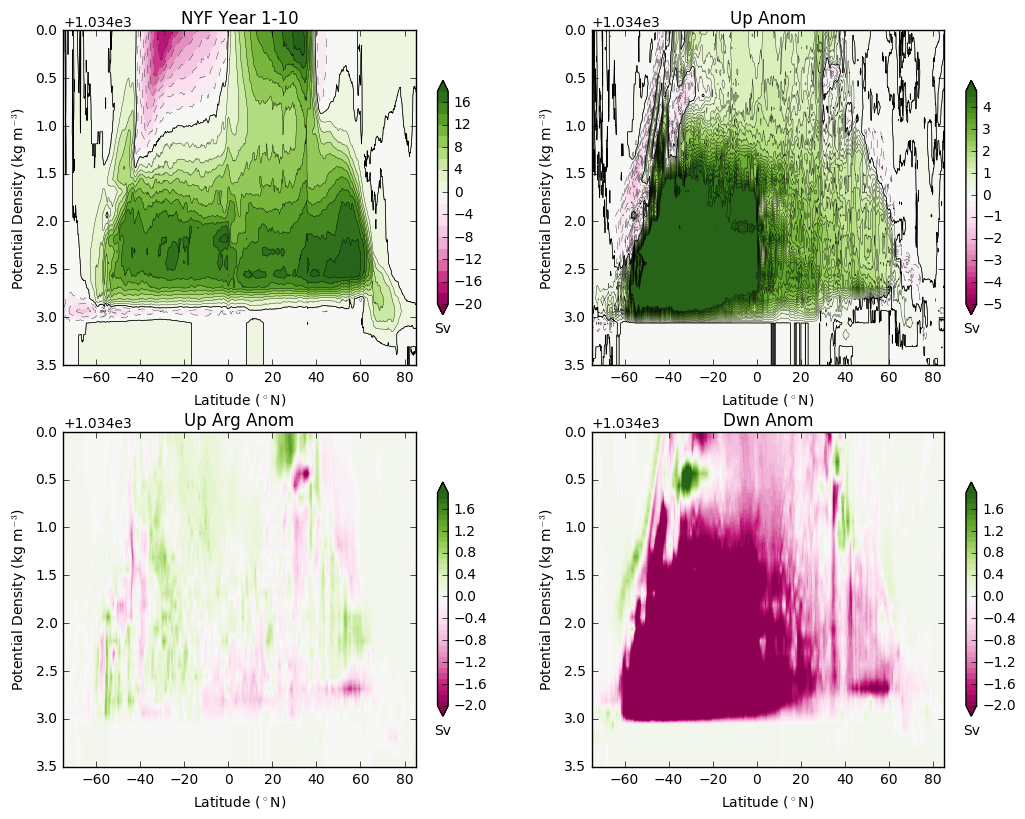

In [8]:


plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

plt.subplot(221)
clev = np.arange(-20,20,2)
plt.contourf(lat,potrho,np.ma.mean(nyf[0:4,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,potrho,np.ma.mean(nyf[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,potrho,np.ma.mean(nyf[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('NYF Year 1-10')

plt.subplot(222)
clev = np.arange(-5,5,.25)
plt.contourf(lat,potrho,np.ma.mean(up[15:19,:,:],axis=0)-np.ma.mean(nyf[15:19,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,potrho,np.ma.mean(up[15:19,:,:],axis=0)-np.ma.mean(nyf[15:19,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,potrho,np.ma.mean(up[15:19,:,:],axis=0)-np.ma.mean(nyf[15:19,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Up Anom')

plt.subplot(223)
clev = np.arange(-2,2,.1)
plt.contourf(lat,potrho,np.ma.mean(uparg[15:19,:,:],axis=0)-np.ma.mean(nyf[15:19,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
#plt.contour(lat,potrho,np.ma.mean(avg,axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(lat,potrho,np.ma.mean(avg,axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Up Arg Anom')

plt.subplot(224)
clev = np.arange(-2,2,.1)
plt.contourf(lat,potrho,np.ma.mean(dwn[10:12,:,:],axis=0)-np.ma.mean(nyf[10:12,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
#plt.contour(lat,potrho,np.ma.mean(avg,axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(lat,potrho,np.ma.mean(avg,axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Dwn Anom')






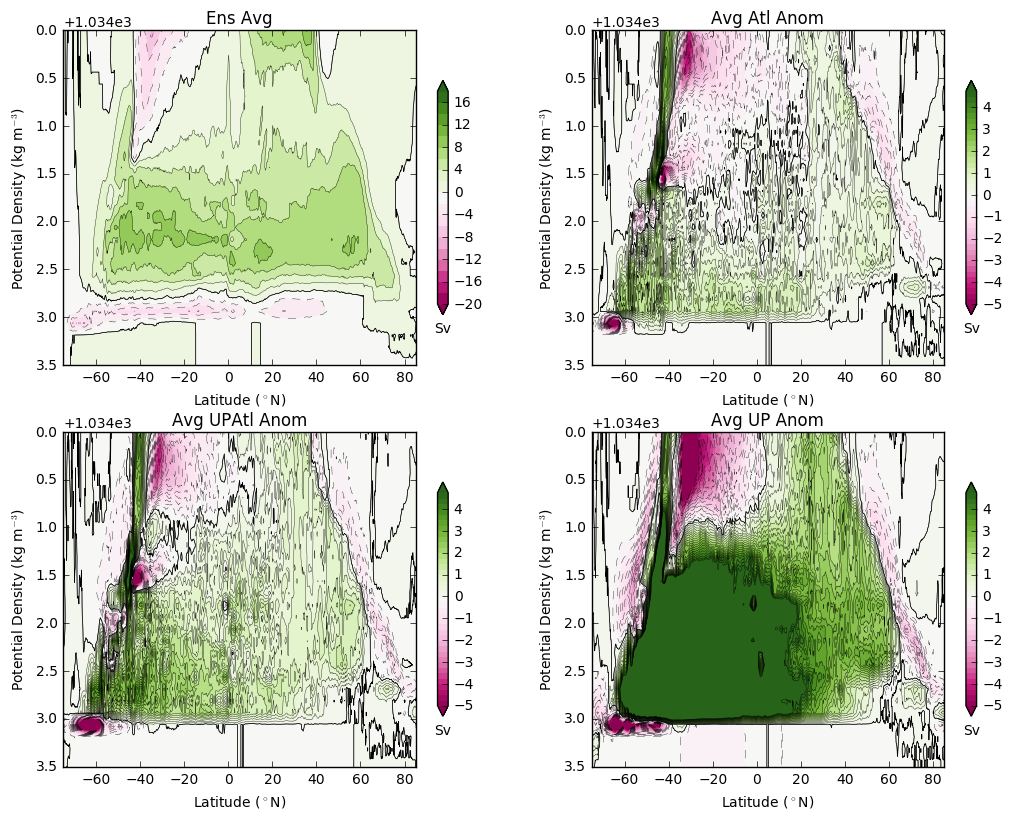

In [10]:

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

plt.subplot(221)
clev = np.arange(-20,20,2)
plt.contourf(lat,potrho,np.ma.mean(avg[0:4,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,potrho,np.ma.mean(avg[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,potrho,np.ma.mean(avg[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Ens Avg')

plt.subplot(222)
clev = np.arange(-5,5,.25)
plt.contourf(lat,potrho,np.ma.mean(avgatl[15:19,:,:],axis=0)-np.ma.mean(avg[15:19,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,potrho,np.ma.mean(avgatl[15:19,:,:],axis=0)-np.ma.mean(avg[15:19,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,potrho,np.ma.mean(avgatl[15:19,:,:],axis=0)-np.ma.mean(avg[15:19,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Avg Atl Anom')

plt.subplot(223)
clev = np.arange(-5,5,.25)
plt.contourf(lat,potrho,np.ma.mean(avgupatl[15:19,:,:],axis=0)-np.ma.mean(avg[15:19,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,potrho,np.ma.mean(avgupatl[15:19,:,:],axis=0)-np.ma.mean(avg[15:19,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,potrho,np.ma.mean(avgupatl[15:19,:,:],axis=0)-np.ma.mean(avg[15:19,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Avg UPAtl Anom')

plt.subplot(224)
clev = np.arange(-5,5,.25)
plt.contourf(lat,potrho,np.ma.mean(avgup[15:19,:,:],axis=0)-np.ma.mean(avg[15:19,:,:],axis=0),cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(lat,potrho,np.ma.mean(avgup[15:19,:,:],axis=0)-np.ma.mean(avg[15:19,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.contour(lat,potrho,np.ma.mean(avgup[15:19,:,:],axis=0)-np.ma.mean(avg[15:19,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Avg UP Anom')


In [12]:

print potrho
print potrho[70]
j1 = 230
j2=235
print yt_ocean[j1:j2]

j1 = 130
j2=135
print yt_ocean[j1:j2]

j1 = 370
j2=375
print yt_ocean[j1:j2]
print potrho[65]

j1 = 600
j2=610
print yt_ocean[j1:j2]

j1 = 765
j2=770
print yt_ocean[j1:j2]
print potrho[68]




[ 1028.0625  1028.1875  1028.3125  1028.4375  1028.5625  1028.6875
  1028.8125  1028.9375  1029.0625  1029.1875  1029.3125  1029.4375
  1029.5625  1029.6875  1029.8125  1029.9375  1030.0625  1030.1875
  1030.3125  1030.4375  1030.5625  1030.6875  1030.8125  1030.9375
  1031.0625  1031.1875  1031.3125  1031.4375  1031.5625  1031.6875
  1031.8125  1031.9375  1032.0625  1032.1875  1032.3125  1032.4375
  1032.5625  1032.6875  1032.8125  1032.9375  1033.0625  1033.1875
  1033.3125  1033.4375  1033.5625  1033.6875  1033.8125  1033.9375
  1034.0625  1034.1875  1034.3125  1034.4375  1034.5625  1034.6875
  1034.8125  1034.9375  1035.0625  1035.1875  1035.3125  1035.4375
  1035.5625  1035.6875  1035.8125  1035.9375  1036.0625  1036.1875
  1036.3125  1036.4375  1036.5625  1036.6875  1036.8125  1036.9375
  1037.0625  1037.1875  1037.3125  1037.4375  1037.5625  1037.6875
  1037.8125  1037.9375]
1036.8125
[-55.42352179 -55.28138944 -55.13874852 -54.9955939  -54.8519288 ]
[-67.34918424 -67.24358565 -

[ 55.42352179  55.56514233  55.70625623  55.84686025  55.9869596 ]
1036.1875
1036.5625
(20, 80, 5)
(20,)
(21,)
(21,)
[ 24.81117791  25.03789472  25.26419195  25.49006945  25.71552189
  25.94054921  26.1651461   26.38931259  26.61304344  26.83633873]
1036.1875
(20, 80, 10)
(20,)
(21,)
(14,)
[ 33.52925736  33.73740791  33.94505321  34.15219464  34.35882784
  34.56495427  34.77056961  34.97567539  35.18026735  35.38434708]
1036.1875
(20, 80, 10)
(20,)
(21,)
(14,)


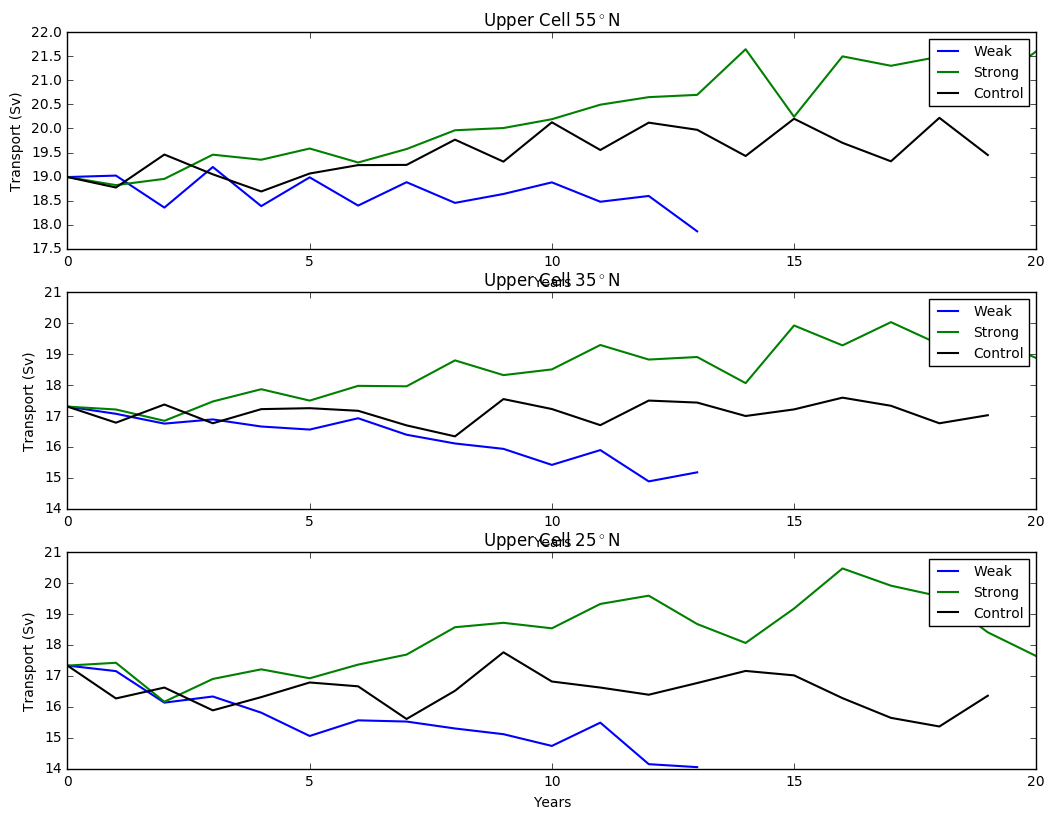

In [19]:
#do nh upper cell at 55N
j1 = 765
j2=770

print yt_ocean[j1:j2]
print potrho[65]
print potrho[68]

rhomin=68

cntrl55N_psj = nyf[:,:,j1:j2]
print cntrl55N_psj.shape
cntrl55N_psj_bar = np.mean(cntrl55N_psj,2)
cntrl55N_psj_ts = np.max(cntrl55N_psj_bar[:,rhomin:],1)
print cntrl55N_psj_ts.shape

up55N_psj = up[:,:,j1:j2]
up55N_psj_bar = np.mean(up55N_psj,2)
up55N_psj_ts = np.max(up55N_psj_bar[:,rhomin:],1)
up55N_psj_ts = np.insert(up55N_psj_ts,0,cntrl55N_psj_ts[0])
print up55N_psj_ts.shape

dwn55N_psj = dwn[:,:,j1:j2]
dwn55N_psj_bar = np.mean(dwn55N_psj,2)
dwn55N_psj_ts = np.max(dwn55N_psj_bar[:,rhomin:],1)
dwn55N_psj_ts = np.insert(dwn55N_psj_ts,0,cntrl55N_psj_ts[0])
print up55N_psj_ts.shape



#do nh upper cell at 25N
j1 = 600
j2=610

print yt_ocean[j1:j2]
print potrho[65]

cntrl25N_psj = nyf[:,:,j1:j2]
print cntrl25N_psj.shape
cntrl25N_psj_bar = np.mean(cntrl25N_psj,2)
cntrl25N_psj_ts = np.max(cntrl25N_psj_bar[:,rhomin:],1)
print cntrl25N_psj_ts.shape

up25N_psj = up[:,:,j1:j2]
up25N_psj_bar = np.mean(up25N_psj,2)
up25N_psj_ts = np.max(up25N_psj_bar[:,rhomin:],1)
up25N_psj_ts = np.insert(up25N_psj_ts,0,cntrl25N_psj_ts[0])
print up25N_psj_ts.shape

dwn25N_psj = dwn[:,:,j1:j2]
dwn25N_psj_bar = np.mean(dwn25N_psj,2)
dwn25N_psj_ts = np.max(dwn25N_psj_bar[:,rhomin:],1)
dwn25N_psj_ts = np.insert(dwn25N_psj_ts,0,cntrl25N_psj_ts[0])
print dwn25N_psj_ts.shape

#do nh upper cell at 35N
j1 = 640
j2=650

print yt_ocean[j1:j2]
print potrho[65]

cntrl35N_psj = nyf[:,:,j1:j2]
print cntrl35N_psj.shape
cntrl35N_psj_bar = np.mean(cntrl35N_psj,2)
cntrl35N_psj_ts = np.max(cntrl35N_psj_bar[:,rhomin:],1)
print cntrl35N_psj_ts.shape

up35N_psj = up[:,:,j1:j2]
up35N_psj_bar = np.mean(up35N_psj,2)
up35N_psj_ts = np.max(up35N_psj_bar[:,rhomin:],1)
up35N_psj_ts = np.insert(up35N_psj_ts,0,cntrl35N_psj_ts[0])
print up35N_psj_ts.shape

dwn35N_psj = dwn[:,:,j1:j2]
dwn35N_psj_bar = np.mean(dwn35N_psj,2)
dwn35N_psj_ts = np.max(dwn35N_psj_bar[:,rhomin:],1)
dwn35N_psj_ts = np.insert(dwn35N_psj_ts,0,cntrl35N_psj_ts[0])
print dwn35N_psj_ts.shape



plt.subplot(311)
plt.plot(dwn55N_psj_ts,linestyle='-',color='b',label='Weak',linewidth=1.5)
plt.plot(up55N_psj_ts,linestyle='-',color='g',label='Strong',linewidth=1.5)
plt.plot(cntrl55N_psj_ts,linestyle='-',color='k',label='Control',linewidth=1.5)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
plt.title('Upper Cell 55$^\circ$N')
plt.legend(fontsize=10)

plt.subplot(312)
plt.plot(dwn35N_psj_ts,linestyle='-',color='b',label='Weak',linewidth=1.5)
plt.plot(up35N_psj_ts,linestyle='-',color='g',label='Strong',linewidth=1.5)
plt.plot(cntrl35N_psj_ts,linestyle='-',color='k',label='Control',linewidth=1.5)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
plt.title('Upper Cell 35$^\circ$N')
plt.legend(fontsize=10)

plt.subplot(313)
plt.plot(dwn25N_psj_ts,linestyle='-',color='b',label='Weak',linewidth=1.5)
plt.plot(up25N_psj_ts,linestyle='-',color='g',label='Strong',linewidth=1.5)
plt.plot(cntrl25N_psj_ts,linestyle='-',color='k',label='Control',linewidth=1.5)
#plt.ylim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([-75,85])
plt.title('Upper Cell 25$^\circ$N')
plt.legend(fontsize=10)

#plt.subplot(311)
#plt.plot(dwn55N_psj_ts,linestyle='-',color='b',linewidth=1.5)
#plt.plot(up55N_psj_ts,linestyle='-',color='g',linewidth=1.5)
#plt.plot(cntrl55N_psj_ts,linestyle='-',color='k',label='55$^\circ$N',linewidth=1.5)
#plt.plot(dwn25N_psj_ts,linestyle=':',color='b',linewidth=1.5)
#plt.plot(up25N_psj_ts,linestyle=':',color='g',linewidth=1.5)
#plt.plot(cntrl25N_psj_ts,linestyle=':',color='k',label='25$^\circ$N',linewidth=1.5)
#plt.plot(dwn35N_psj_ts,linestyle='--',color='b',linewidth=1.5)
#plt.plot(up35N_psj_ts,linestyle='--',color='g',linewidth=1.5)
#plt.plot(cntrl35N_psj_ts,linestyle='--',color='k',label='35$^\circ$N',linewidth=1.5)
##plt.ylim((1037.5,1035))
#plt.ylabel('Transport (Sv)')
#plt.xlabel('Years')
##plt.xlim([-75,85])
#plt.title('Upper Cell')
#plt.legend(fontsize=10)

In [17]:
print yt_ocean[650]

35.5879103651


In [ ]:
cols = ['k','g','r','b','y','m','c']
lines = ['-','-','-','-','-','-','-']
exp_names = ['NYF','NYF-UP','NYF-UPArg','IAFAVG','IAFAVG-ATL','IAFAVG-UP','IAFAVG-UPAtl']
labels = ['NYF','NYF-UP','NYF-UPArg','IAFAVG','IAFAVG-ATL','IAFAVG-UP','IAFAVG-UPAtl']

print labels

# average between i1 and i2
#i1 = 600
#i2=610
#j1 = 230
#j2=235

i1=np.argwhere(yt_ocean>-60)# and lat<-45)
i2=np.argwhere(yt_ocean>-40)# and lat<-45)

j1=np.argwhere(yt_ocean>40)# and lat<-45)
j2=np.argwhere(yt_ocean>60)# and lat<-45)

i1=i1[0]
i2=i2[0]
j1=j1[0]
j2=j2[0]
z1=60

print "Bounding latitudes and rho of psi_sh average:", yt_ocean[i1], yt_ocean[i2], potrho[z1]
print "Bounding latitudes of psi_nh average:", yt_ocean[j1], yt_ocean[j2],potrho[z1]

ii=-1
for f in sim_files:
    ii+=1
    print f

    if ii==0:
        psi = nyf[:,z1:,i1:i2]
        psj = nyf[:,z1:,j1:j2]
    if ii==1:
        psi = up[:,z1:,i1:i2]
        psj = up[:,z1:,j1:j2]
    if ii==2:
        psi = uparg[:,z1:,i1:i2]
        psj = uparg[:,z1:,j1:j2]
    if ii==3:
        psi = avg[:,z1:,i1:i2]
        psj = avg[:,z1:,j1:j2]
    if ii==4:
        psi = avgatl[:,z1:,i1:i2]
        psj = avgatl[:,z1:,j1:j2]
    
               
    #sh upper moc
    #mean over lat band
    psi_bar = np.mean(psi,2)
    #max over lat band
    #psi_bar = np.mean(psi,2)
    #max over depth band
    psi_ts = np.max(psi_bar,1)
    print 'psi_bar nh', psi_bar.shape
    print 'psi_ts', psi_ts.shape
    
    # Add year 500
    #T = np.insert(T,0,500.)
    #psi_ts = np.insert(psi_ts,0,16.6)
    T = range(0,psi.shape[0]) 
    print T
    plt.subplot(311)
    plt.plot(T,psi_ts,linestyle=lines[ii],color=cols[ii],linewidth=1.5)
    
    # do lower cell
    #psj_bar = np.mean(psj,2)
    #psj_ts = -np.min(psj_bar[:,50:],1)
    ##psj_ts = np.insert(psj_ts,0,6.5)
    
                   
    #nh upper moc
    #mean over lat band
    psj_bar = np.mean(psj,2)
    #max over lat band
    #psj_bar = np.mean(psi,2)
    #max over depth band
    psj_ts = np.max(psj_bar,1)
    print 'psj_bar nh', psj_bar.shape
    print 'psj_ts', psj_ts.shape

    plt.subplot(312)
    plt.plot(T,psj_ts,linestyle=lines[ii],color=cols[ii],label=labels[ii],linewidth=1.5)

plt.legend()
print "Bounding latitudes of psi_upper average:", lat[i1], lat[i2]
print "Bounding latitudes of psi_lower average:", lat[j1], lat[j2]
    
plt.subplot(311)
plt.ylabel('Southern Branch Overturning (Sv)')
#plt.xlabel('Time (years)')
plt.title('(a)')

plt.subplot(312)
plt.ylabel('North Atlantic Overturning (Sv)')
#plt.xlabel('Time (years)')
plt.title('(b)')
plt.legend(fontsize=10)


#plt.savefig('figures/BasicStats.pdf')    

## Plot MLD with contour overlays

mld bounds lon1 lon2 lat1 lat2 [-99.875] [ 50.125] [ 40.12520403] [ 80.02101494]
/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ocean.ncra501-520.nc
(1, 1080, 1440)


/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/ipykernel/__main__.py:52: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/numpy/ma/core.py:3158: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout = self.data[indx]
/g/data1/v45/pas561/anaconda/envs/oceanpy27/lib/python2.7/site-packages/numpy/ma/core.py:3213: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout._mask = _mask[indx]


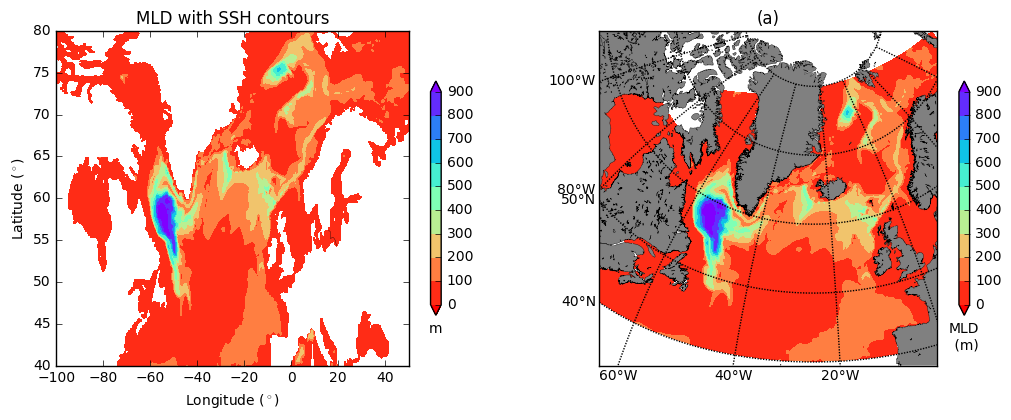

In [7]:
ii1=np.argwhere(xt_ocean>-100)# and lat<-45)
ii2=np.argwhere(xt_ocean>50)# and lat<-45)
jj1=np.argwhere(yt_ocean>40)# and lat<-45)
jj2=np.argwhere(yt_ocean>80)# and lat<-45)
ii1=ii1[0]
ii2=ii2[0]
jj1=jj1[0]
jj2=jj2[0]


print "mld bounds lon1 lon2 lat1 lat2", xt_ocean[ii1], xt_ocean[ii2], yt_ocean[jj1], yt_ocean[jj2]

plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

for f in range(0,1):
    #ii+=1
    if f==0:
        nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
        print vgrid_file
        nyf_mld = nc.variables['mld'][:]
        nyf_ssh = nc.variables['sea_level'][:]
        nc.close() # close the file

        

plt.subplot(221)
print nyf_mld.shape

clev = np.arange(0,1000,100)
plt.contourf(geolon_t,geolat_t,nyf_mld[0],cmap=plt.cm.rainbow_r,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m')
#clev = np.arange(-2,1,0.05)
#plt.hold()
plt.contour(geolon_t,geolat_t,nyf_ssh[0],levels=clev,colors='k',linewidths=0.25)
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.ylim([40,80])
plt.xlim([-100,50])
plt.title('MLD with SSH contours')

plt.subplot(222)

clev = np.arange(0,1000,100)
map = Basemap(llcrnrlon=-63,llcrnrlat=33,urcrnrlon=59,urcrnrlat=72,resolution='i',projection='cass',lon_0=-25,lat_0=66)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,True])
map.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True])
X, Y = map(geolon_t[jj1:jj2,ii1:ii2],geolat_t[jj1:jj2,ii1:ii2]) 
map.contourf(X,Y,nyf_mld[0,jj1:jj2,ii1:ii2], cmap=plt.cm.rainbow_r, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb = plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('MLD\n (m)')
plt.title('(a)')

plt.show()


## calculate wind power input

In [ ]:
#Eg. 3 of APE Hogg et al. 2016 for wind power input
#wstrp = 1/V int{u*tx +v*ty}dS
#from final figures Phi_tau = nc.variables['Phi_tau'][:]
   

## plot a zonal mean of SSH

In [ ]:
ssh_mabar = np.ma.mean(ssh,axis=2)[0,:]
ssh_bar = np.mean(ssh,axis=2)[0,:]

plt.plot(lat,ssh_mabar,linestyle='-',color='r',linewidth=1.5,label='masked')
plt.plot(lat,ssh_bar,linestyle='-',color='k',linewidth=1.5,label='no mask')

plt.show()

## note that masked values are excluded in the mean

In [ ]:
ssh_bar[:]

In [ ]:
ssh_mabar[:]